In [8]:
import pandas as pd

In [9]:
salaries_df = pd.read_csv('../data/adult.csv', na_values=["?", " ?"])
salaries_df = salaries_df.rename(columns={
    'age': 'age',
    'workclass': 'workclass',
    'fnlwgt': 'final_weight',
    'education': 'education',
    'education.num': 'education_number',
    'marital.status': 'marital_status',
    'occupation': 'occupation',
    'relationship': 'relationship',
    'race' : 'race', 
    'sex' : "sex",
    'capital.gain':"capital_gain", 
    'capital.loss' : 'capital_loss', 
    'hours.per.week': "hours_per_week",
    'native.country': 'native_country',
    'income': 'income'
})
salaries_df.head()

,age,workclass,final_weight,education,education_number,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [10]:
salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               32561 non-null  int64 
 1   workclass         30725 non-null  object
 2   final_weight      32561 non-null  int64 
 3   education         32561 non-null  object
 4   education_number  32561 non-null  int64 
 5   marital_status    32561 non-null  object
 6   occupation        30718 non-null  object
 7   relationship      32561 non-null  object
 8   race              32561 non-null  object
 9   sex               32561 non-null  object
 10  capital_gain      32561 non-null  int64 
 11  capital_loss      32561 non-null  int64 
 12  hours_per_week    32561 non-null  int64 
 13  native_country    31978 non-null  object
 14  income            32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [11]:

salaries_df.describe()

,age,final_weight,education_number,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [12]:
salaries_df["income"]= salaries_df["income"].str.strip()
salaries_df.value_counts(subset=["income"],normalize=True)

income
<=50K     0.75919
>50K      0.24081
Name: proportion, dtype: float64

In [13]:
missing_pct = salaries_df.isna().mean().sort_values(ascending=False)
missing_pct[missing_pct > 0]

occupation        0.056601
workclass         0.056386
native_country    0.017905
dtype: float64

In [14]:
## Checking for redundant columns
salaries_df[['education', 'education_number']].head(10)

,education,education_number
0,HS-grad,9
1,HS-grad,9
2,Some-college,10
3,7th-8th,4
4,Some-college,10
5,HS-grad,9
6,10th,6
7,Doctorate,16
8,HS-grad,9
9,Some-college,10


In [15]:
salaries_df.duplicated().sum()

np.int64(24)

In [ ]:
# Handling missing values
for col in ['occupation', 'workclass', 'native_country']:
    salaries_df[col] = salaries_df[col].fillna("is_missing_from_data")

In [ ]:
# Removing redundant columns
salaries_df = salaries_df.drop(columns=['education'])

In [21]:
# Handling duplicates
before = salaries_df.shape[0]
salaries_df = salaries_df.drop_duplicates()
after = salaries_df.shape[0]
print(f"Dropped {before - after} duplicate rows.")

Dropped 24 duplicate rows.


In [22]:
import numpy as np
cat_cols = salaries_df.select_dtypes(include="object").columns.drop("income")
num_cols = salaries_df.select_dtypes(include=[np.number]).columns

cardinality = salaries_df[cat_cols].nunique().sort_values(ascending=False)
display(cardinality)

native_country    42
occupation        15
workclass          9
marital_status     7
relationship       6
race               5
sex                2
dtype: int64

In [23]:
from scipy.stats import pointbiserialr
import pandas as pd

y = (salaries_df['income'] == '>50K').astype(int)
pb_corrs = []
for col in num_cols:
    r, p = pointbiserialr(y, salaries_df[col])
    pb_corrs.append((col, r))
pd.DataFrame(pb_corrs, columns=['feature', 'point_biserial_corr']).sort_values('point_biserial_corr', ascending=False)


,feature,point_biserial_corr
2,education_number,0.335272
0,age,0.234037
5,hours_per_week,0.229658
3,capital_gain,0.223336
4,capital_loss,0.150501
1,final_weight,-0.009502


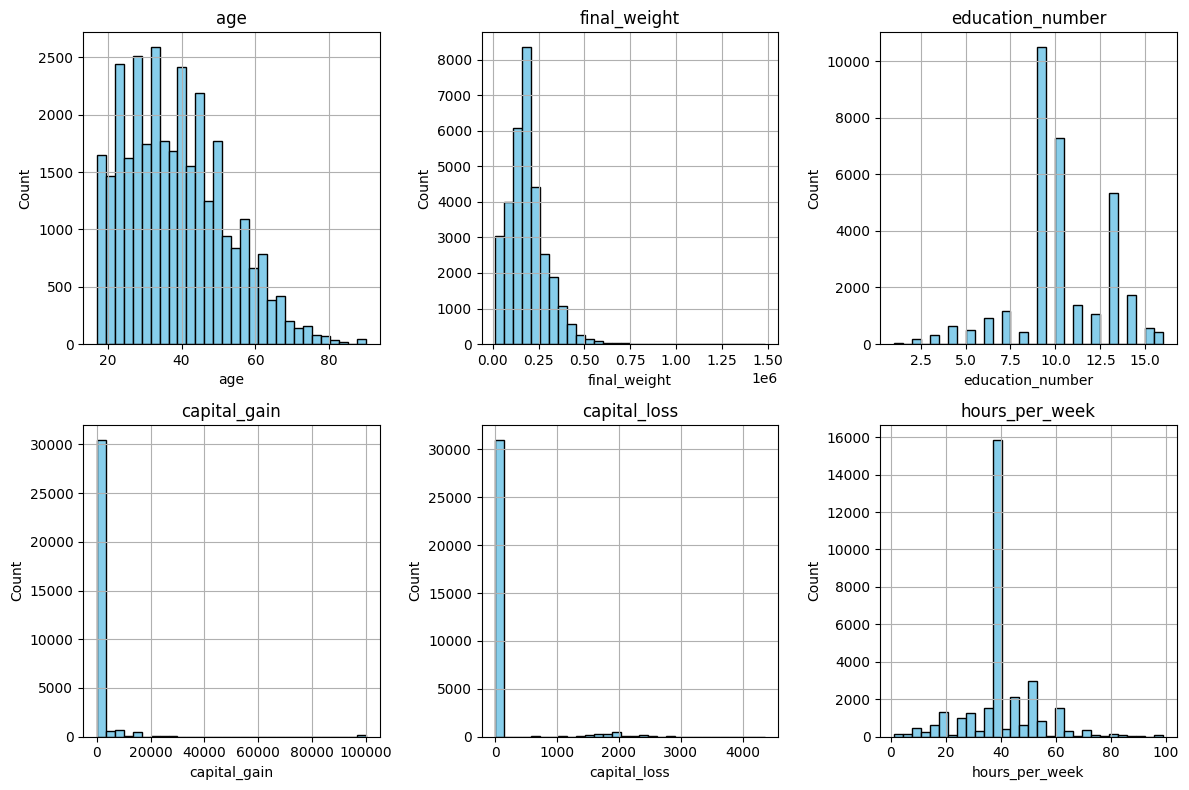

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()  # to loop easily

for idx, col in enumerate(num_cols):
    salaries_df[col].hist(bins=30, ax=axes[idx], color='skyblue', edgecolor='black')
    axes[idx].set_title(col)
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel("Count")

# Hide any unused subplots if num_cols < grid size
for j in range(len(num_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


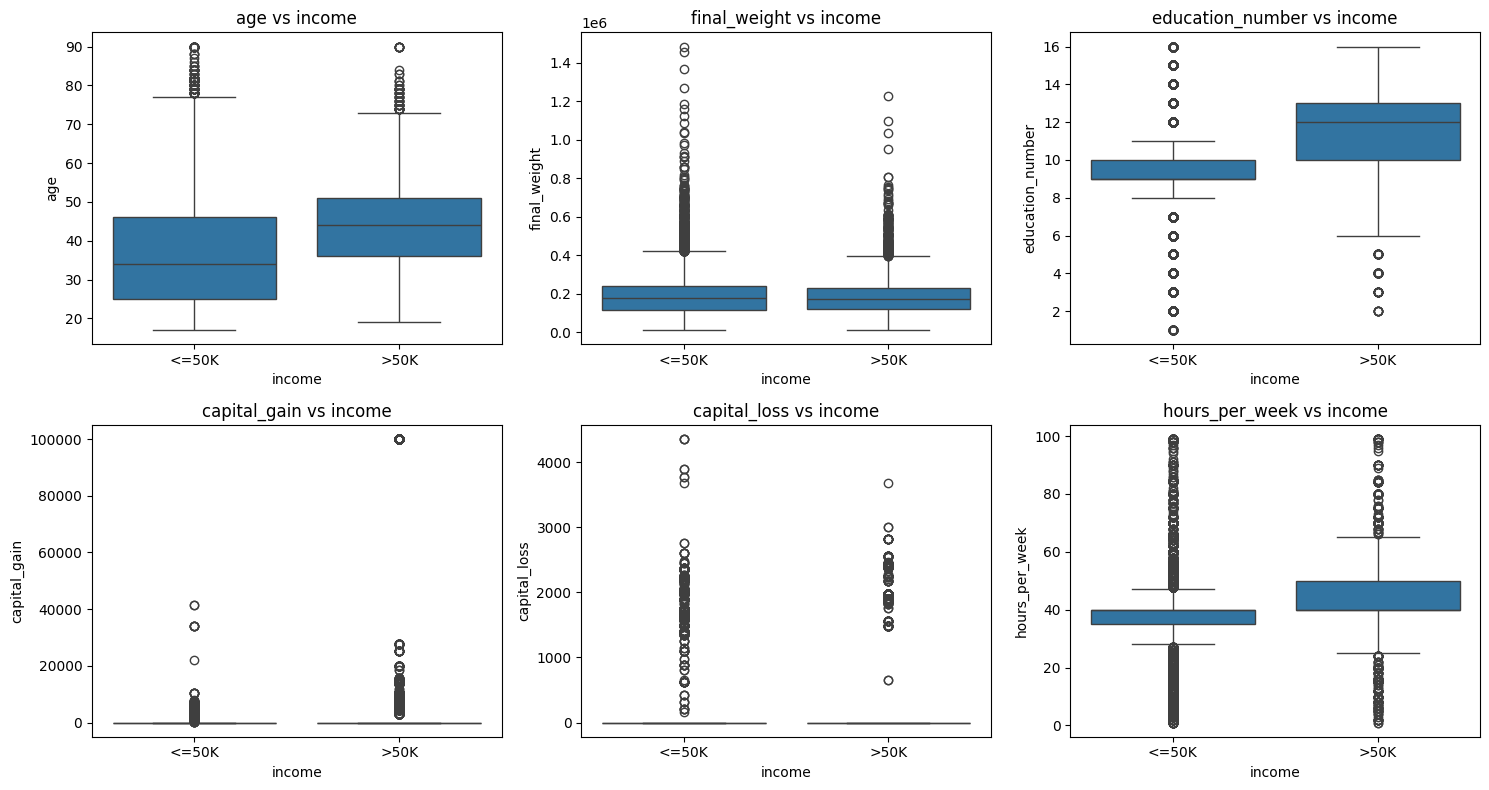

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for idx, col in enumerate(num_cols):
    sns.boxplot(x='income', y=col, data=salaries_df, ax=axes[idx])
    axes[idx].set_title(f'{col} vs income')

plt.tight_layout()
plt.show()


In [27]:
from sklearn.model_selection import train_test_split
from pathlib import Path

def split_train_test(input_path,df, test_size=0.2, random_state=42):
    input_path = Path(input_path)
    
    # Stratified split on income
    train_df, test_df = train_test_split(
        df,
        test_size=test_size,
        stratify=df['income'],
        random_state=random_state
    )
    
    # Save to disk
    train_file = input_path.parent / "train.csv"
    test_file = input_path.parent / "test.csv"
    train_df.to_csv(train_file, index=False)
    test_df.to_csv(test_file, index=False)
    
    print(f"Train set: {train_df.shape}, saved to {train_file}")
    print(f"Test set: {test_df.shape}, saved to {test_file}")



In [28]:
split_train_test('../data/adult.csv', salaries_df, test_size=0.2, random_state=42)

Train set: (26029, 14), saved to ../data/train.csv
Test set: (6508, 14), saved to ../data/test.csv
